In [1]:
#Importaciones
from loadsets import load_sets
from utiles import graficar_sets


#Cargamos los sets
sets = load_sets()

[it_train, it_validation, it_test, it_mtest] = sets

#Graficamos los sets
#graficar_sets(sets)


Train:
Found 1726 images belonging to 10 classes.
Validation:
Found 200 images belonging to 10 classes.
Test:
Found 136 images belonging to 10 classes.
Meta-test:
Found 10 images belonging to 10 classes.


In [2]:
from modelo_sign02 import create_model_sign02
from tensorflow.keras.utils import plot_model

models = list()

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [64, 128, 256, 512],
        kernel_sizes = [3, 3, 3, 3],  
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [128, 512],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [400, 600, 1200, 1400],
        kernel_sizes = [7, 5, 3, 3],
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [128, 512],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [64, 128, 256, 512],
        kernel_sizes = [3, 3, 3, 3],  
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [512, 1024],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [400, 600, 1200, 1400],
        kernel_sizes = [7, 5, 3, 3],
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [512, 1024],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [64, 128, 256, 512],
        kernel_sizes = [3, 3, 3, 3],  
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [128, 256],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [400, 600, 1200, 1400],
        kernel_sizes = [7, 5, 3, 3],
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [128, 256],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)





#model.summary()

#plot_model(model, to_file='s01v01.png', show_shapes=True, show_layer_names=True)



 --------- VARIANTE  1 ---------


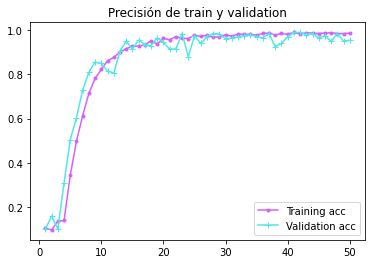

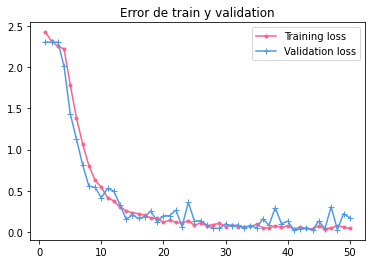


--TEST--
Test accuracy: 93.4%
Test acc:  0.9338235259056091
Test loss:  0.410098671913147

--METATEST--
Meta-Test accuracy: 80.0%
Meta-Test acc: 0.800000011920929
Meta-Test loss: 0.6091869473457336


 --------- VARIANTE  2 ---------


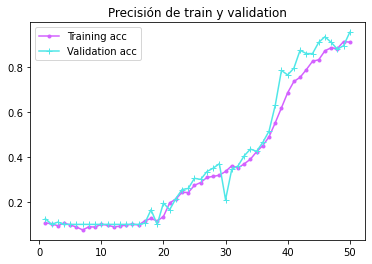

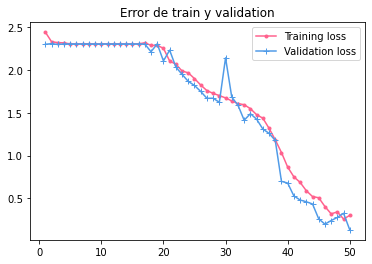


--TEST--
Test accuracy: 93.4%
Test acc:  0.9338235259056091
Test loss:  0.23938694596290588

--METATEST--
Meta-Test accuracy: 60.0%
Meta-Test acc: 0.6000000238418579
Meta-Test loss: 1.0071405172348022


 --------- VARIANTE  3 ---------


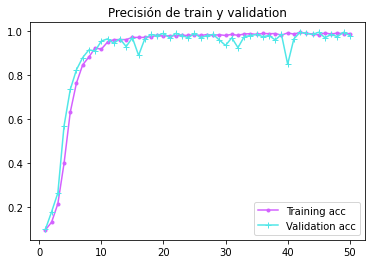

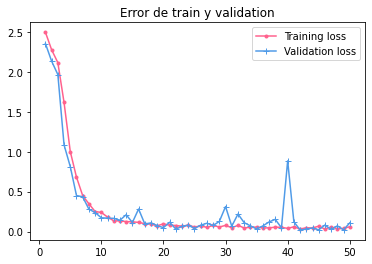


--TEST--
Test accuracy: 96.3%
Test acc:  0.9632353186607361
Test loss:  0.2557503283023834

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 8.873783111572266


 --------- VARIANTE  4 ---------


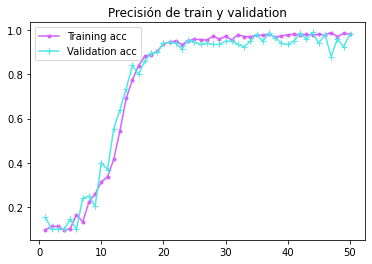

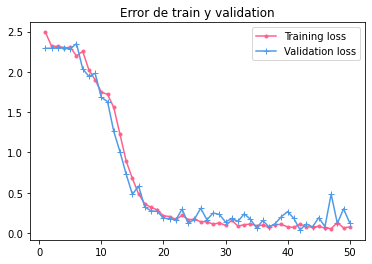


--TEST--
Test accuracy: 94.9%
Test acc:  0.9485294222831726
Test loss:  0.13451805710792542

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 2.698058605194092


 --------- VARIANTE  5 ---------


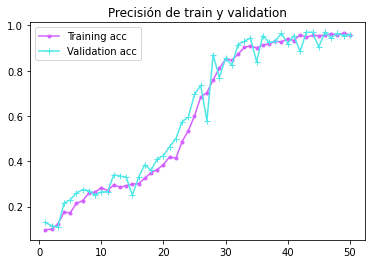

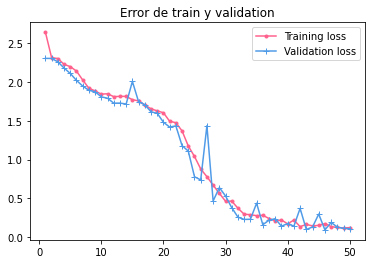


--TEST--
Test accuracy: 95.6%
Test acc:  0.9558823704719543
Test loss:  0.1640838384628296

--METATEST--
Meta-Test accuracy: 10.0%
Meta-Test acc: 0.10000000149011612
Meta-Test loss: 14.257105827331543


 --------- VARIANTE  6 ---------


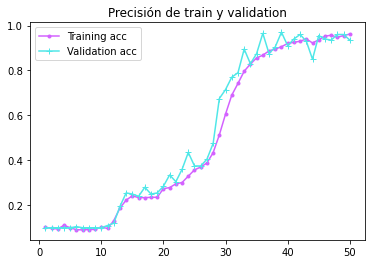

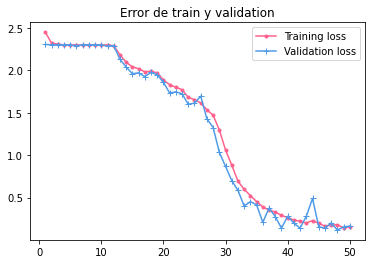


--TEST--
Test accuracy: 93.4%
Test acc:  0.9338235259056091
Test loss:  0.2261231392621994

--METATEST--
Meta-Test accuracy: 80.0%
Meta-Test acc: 0.800000011920929
Meta-Test loss: 0.5733876824378967


In [3]:
from tensorflow.keras.optimizers import Adam
from utiles import draw_history

########################################### COMP & FIT ###########################################

histories = list()

#Compilación y Entrenamiento
learning_rate = 0.0001
batch_size = 128
epochs = 50

index = 0
for model in models:

    index += 1
    print("\n\n --------- VARIANTE ", index, "---------")

    model.compile(
        loss='categorical_crossentropy',
        optimizer= Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    history = model.fit(
        it_train,
        epochs=epochs, 
        batch_size=batch_size,
        shuffle=True, 
        validation_data=it_validation, 
        verbose=0 
    )    

    loss_test, acc_test = model.evaluate(
                it_test,
                verbose=0
        ) 

    loss_mtest, acc_mtest = model.evaluate(
                it_mtest,
                verbose=0
                ) 
        
    
    draw_history(history)

    print("\n--TEST--")  
    print("Test accuracy: %.1f%%" % (100.0 * acc_test))  
    print("Test acc: ", acc_test)  
    print("Test loss: ", loss_test)  
    print("\n--METATEST--")  
    print("Meta-Test accuracy: %.1f%%" % (100.0 * acc_mtest))  
    print("Meta-Test acc:", acc_mtest)  
    print("Meta-Test loss:", loss_mtest)  
